<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Packages" data-toc-modified-id="Packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Packages</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Functions</a></span><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Cost-function" data-toc-modified-id="Cost-function-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Cost function</a></span></li><li><span><a href="#Algorithms" data-toc-modified-id="Algorithms-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Algorithms</a></span><ul class="toc-item"><li><span><a href="#Cramer" data-toc-modified-id="Cramer-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Cramer</a></span></li><li><span><a href="#gradient-constant-step" data-toc-modified-id="gradient-constant-step-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>gradient constant step</a></span></li><li><span><a href="#gradient-optimal-step" data-toc-modified-id="gradient-optimal-step-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>gradient optimal step</a></span></li><li><span><a href="#gradient-conjugate" data-toc-modified-id="gradient-conjugate-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>gradient conjugate</a></span></li></ul></li></ul></li><li><span><a href="#Why-algo-instead-of-Cramer's-method?" data-toc-modified-id="Why-algo-instead-of-Cramer's-method?-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Why algo instead of Cramer's method?</a></span><ul class="toc-item"><li><span><a href="#Paramaters" data-toc-modified-id="Paramaters-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Paramaters</a></span></li><li><span><a href="#Parametric-study" data-toc-modified-id="Parametric-study-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Parametric study</a></span></li></ul></li><li><span><a href="#Step-size-sensivity-analysis" data-toc-modified-id="Step-size-sensivity-analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Step size sensivity analysis</a></span><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Compute-cost-function-values-over-a-surface" data-toc-modified-id="Compute-cost-function-values-over-a-surface-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Compute cost function values over a surface</a></span></li><li><span><a href="#Solve-with-algorithm-gradient-with-constant-step" data-toc-modified-id="Solve-with-algorithm-gradient-with-constant-step-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Solve with algorithm gradient with constant step</a></span></li><li><span><a href="#Display-iso-level-cost-and-paths" data-toc-modified-id="Display-iso-level-cost-and-paths-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Display iso level cost and paths</a></span></li></ul></li><li><span><a href="#Limit-of-algorithm-optimal-step" data-toc-modified-id="Limit-of-algorithm-optimal-step-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Limit of algorithm optimal step</a></span><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Compute-cost-function-values-over-a-surface" data-toc-modified-id="Compute-cost-function-values-over-a-surface-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Compute cost function values over a surface</a></span></li><li><span><a href="#Set-initial-solution" data-toc-modified-id="Set-initial-solution-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Set initial solution</a></span><ul class="toc-item"><li><span><a href="#Solve-with-algorithm-gradient-optimal-step" data-toc-modified-id="Solve-with-algorithm-gradient-optimal-step-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Solve with algorithm gradient optimal step</a></span></li><li><span><a href="#Solve-with-algorithm-conjugate-gradient" data-toc-modified-id="Solve-with-algorithm-conjugate-gradient-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>Solve with algorithm conjugate gradient</a></span></li><li><span><a href="#Display-paths" data-toc-modified-id="Display-paths-5.3.3"><span class="toc-item-num">5.3.3&nbsp;&nbsp;</span>Display paths</a></span></li></ul></li></ul></li></ul></div>

___
# Packages

In [1]:
%load_ext nb_black
import time

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ortho_group

<IPython.core.display.Javascript object>

___
# Functions

## Data

In [2]:
def get_A(n, lambda_min, lambda_max):
    """
    Create a matrix symetric with eigenvalues between lamba_min and lambda_max.
    """
    eigenvalues = np.random.uniform(low=0.0, high=1.0, size=n)
    eigenvalues = (eigenvalues - min(eigenvalues)) * (lambda_max - lambda_min) / (
        max(eigenvalues) - min(eigenvalues)
    ) + lambda_min
    P = ortho_group.rvs(dim=n)
    A = np.matmul(np.matmul(P.T, np.diag(eigenvalues)), P)
    return A


def get_b(n, b_min, b_max):
    """
    Create a vector with value between b_min and b_max.
    """
    b = np.random.uniform(low=0.0, high=1.0, size=n)
    b = (b - min(b)) * (b_max - b_min) / (max(b) - min(b)) + b_min
    return np.expand_dims(b, 1)

<IPython.core.display.Javascript object>

## Cost function

In [3]:
def get_cost(A, b, x):
    return 0.5 * np.matmul(x.T, np.matmul(A, x))[0, 0] - np.matmul(b.T, x)[0, 0]

<IPython.core.display.Javascript object>

## Algorithms
Algorithms to solve the following minimization problem (with A symetric positive):
$$\left( u = \underset{x \in  \mathbb{R}^n}{\mathrm{argmin}} \frac{1}{2}x^TAx-b^Tx+c \right) \iff \left( Au=b \right) $$

### Cramer
Only if A is definite, otherwise the inverse does not exist.

In [4]:
def cramer_algo(A, b):
    u = []
    den = np.linalg.det(A)
    for ii in range(A.shape[0]):
        A_ = A.copy()
        A_[:, [ii]] = b
        u.append(np.linalg.det(A_) / den)
    return np.expand_dims(np.array(u), 1)

<IPython.core.display.Javascript object>

### gradient constant step

In [5]:
def gradient_constant_step(A, b, u_0, step, epsilon=1e-6, it_max=10000):
    u = u_0
    it = 0
    error = np.linalg.norm(np.matmul(A, u) - b, ord=2)

    while it <= it_max and error > epsilon:
        it += 1
        d = b - np.matmul(A, u)
        u = u + step * d
        error = np.linalg.norm(np.matmul(A, u) - b, ord=2)

    return u

<IPython.core.display.Javascript object>

### gradient optimal step

In [6]:
def gradient_optimal_step(A, b, u_0, epsilon=1e-6, it_max=10000):
    u = u_0
    it = 0
    error = np.linalg.norm(np.matmul(A, u) - b, ord=2)

    while it <= it_max and error > epsilon:
        it += 1
        d = b - np.matmul(A, u)
        rho = np.linalg.norm(d, ord=2) ** 2 / (np.matmul(d.T, np.matmul(A, d)))[0, 0]
        u = u + rho * d
        error = np.linalg.norm(np.matmul(A, u) - b, ord=2)

    return u

<IPython.core.display.Javascript object>

### gradient conjugate

In [7]:
def gradient_conjugate(A, b, u_0, epsilon=1e-6):
    u = u_0
    g = np.matmul(A, u) - b
    d = -g
    error = np.linalg.norm(g, ord=2)

    while error > epsilon:
        beta = np.matmul(g.T, d)[0, 0] / (np.matmul(d.T, np.matmul(A, d))[0, 0])
        u = u - beta * d
        g_prev_norm = np.linalg.norm(g, ord=2)
        g = np.matmul(A, u) - b
        alpha = (np.linalg.norm(g, ord=2) / g_prev_norm) ** 2
        d = alpha * d - g
        error = np.linalg.norm(np.matmul(A, u) - b, ord=2)

    return u

<IPython.core.display.Javascript object>

___
# Why algo instead of Cramer's method?

## Paramaters

In [8]:
lambda_max = 3
lambda_min = 1
b_min = -2
b_max = 2

<IPython.core.display.Javascript object>

## Parametric study

In [9]:
time_computation_with_cramer_list = []
time_computation_with_algo_list = []
n_list = [int(ii) for ii in np.logspace(1, 10, base=2, num=10)]

for n in n_list:
    print(n)
    A = get_A(n, lambda_min, lambda_max)
    b = get_b(n, b_min, b_max)

    tic = time.time()
    u = cramer_algo(A, b)
    toc = time.time()
    time_with_cramer = toc - tic
    time_computation_with_cramer_list.append(time_with_cramer)

    tic = time.time()
    u = gradient_optimal_step(A, b, np.array([[0]] * n))
    toc = time.time()
    time_with_algo = toc - tic
    time_computation_with_algo_list.append(time_with_algo)

2
4
8
16
32
64
128
256
512
1024


<IPython.core.display.Javascript object>

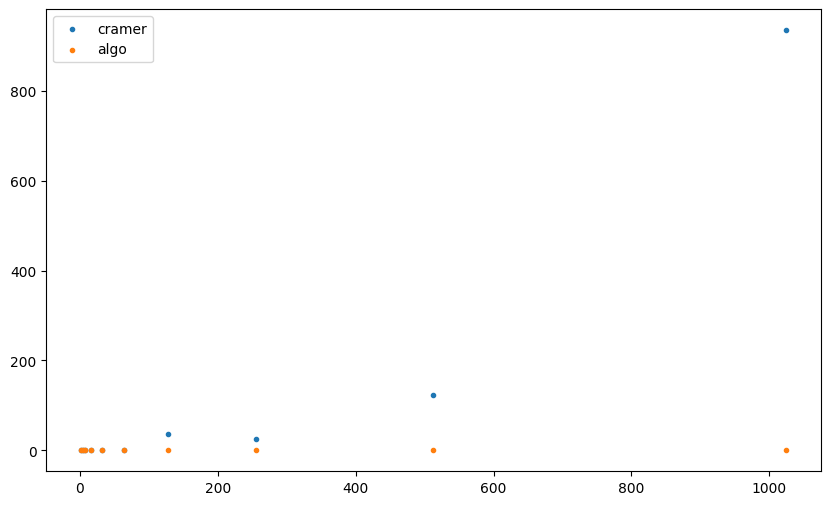

<IPython.core.display.Javascript object>

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.scatter(n_list, time_computation_with_cramer_list, label="cramer", marker=".")
ax.scatter(n_list, time_computation_with_algo_list, label="algo", marker=".")
ax.legend()

___
# Step size sensivity analysis

## Data

In [11]:
A = np.array([[4, 0], [0, 3]])
b = np.array([[1], [1]])
u_0 = np.array([[2], [2]])

<IPython.core.display.Javascript object>

## Compute cost function values over a surface

In [12]:
delta = 0.1
x = np.arange(-1, 3, delta)
y = np.arange(-1, 3, delta)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for ii in range(Z.shape[0]):
    for jj in range(Z.shape[1]):
        u = np.array([[X[ii, jj]], [Y[ii, jj]]])
        Z[ii, jj] = get_cost(A, b, u)

<IPython.core.display.Javascript object>

## Solve with algorithm gradient with constant step

In [13]:
def get_path(u_0, it_max, step):
    u = u_0
    u_list = [u]
    it = 0

    while it <= it_max:
        it += 1
        d = b - np.matmul(A, u)
        u = u + step * d
        u_list.append(u)

    return u_list


# long step
u_list_constant_step_max = get_path(u_0, 10, 0.49)  # step < 2 / lambda_max

# long step
u_list_constant_step_low = get_path(u_0, 10, 0.05)

# optimal step
u_list_constant_step_opt = get_path(
    u_0, 10, 2 / (3 + 4)
)  # step = 2 / ( lambda_min + lambda_max )

<IPython.core.display.Javascript object>

## Display iso level cost and paths

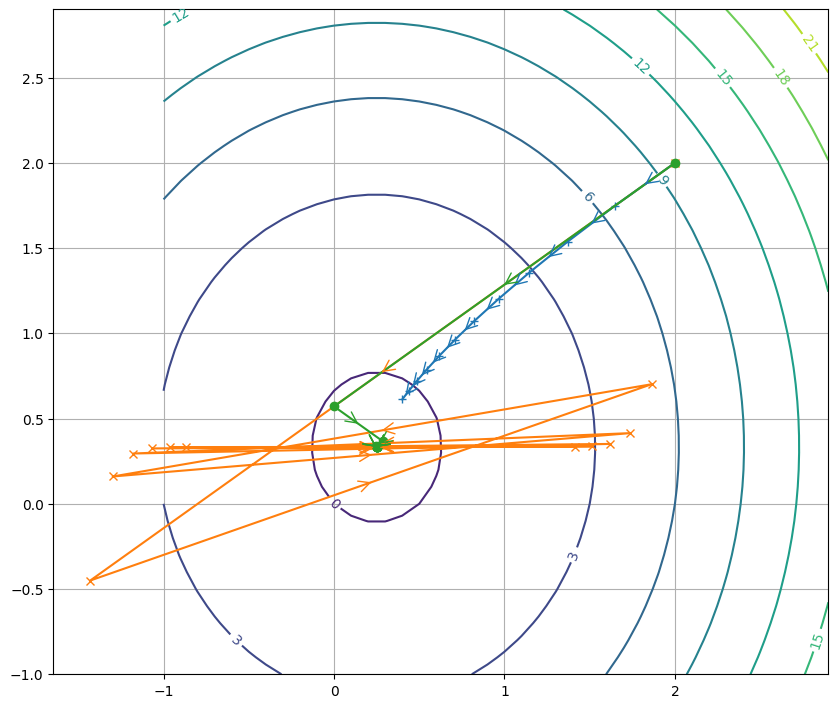

<IPython.core.display.Javascript object>

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))

CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)

ax.plot(
    [u[0] for u in u_list_constant_step_max],
    [u[1] for u in u_list_constant_step_max],
    marker="x",
    label="max step",
    color="tab:orange",
)
x = np.array([u[0][0] for u in u_list_constant_step_max])
y = np.array([u[1][0] for u in u_list_constant_step_max])
x0 = x[:-1]
x1 = x[1:]
y0 = y[:-1]
y1 = y[1:]
xpos = (x0 + x1) / 2
ypos = (y0 + y1) / 2
xdir = x1 - x0
ydir = y1 - y0

for X, Y, dX, dY in zip(xpos, ypos, xdir, ydir):
    ax.annotate(
        "",
        xytext=(X, Y),
        xy=(X + 0.001 * dX, Y + 0.001 * dY),
        arrowprops=dict(arrowstyle="->", color="tab:orange"),
        size=20,
    )

ax.plot(
    [u[0] for u in u_list_constant_step_low],
    [u[1] for u in u_list_constant_step_low],
    marker="+",
    label="low",
    color="tab:blue",
)
x = np.array([u[0][0] for u in u_list_constant_step_low])
y = np.array([u[1][0] for u in u_list_constant_step_low])
x0 = x[:-1]
x1 = x[1:]
y0 = y[:-1]
y1 = y[1:]
xpos = (x0 + x1) / 2
ypos = (y0 + y1) / 2
xdir = x1 - x0
ydir = y1 - y0

for X, Y, dX, dY in zip(xpos, ypos, xdir, ydir):
    ax.annotate(
        "",
        xytext=(X, Y),
        xy=(X + 0.001 * dX, Y + 0.001 * dY),
        arrowprops=dict(arrowstyle="->", color="tab:blue"),
        size=20,
    )

ax.plot(
    [u[0] for u in u_list_constant_step_opt],
    [u[1] for u in u_list_constant_step_opt],
    marker="o",
    label="opt",
    color="tab:green",
)
x = np.array([u[0][0] for u in u_list_constant_step_opt])
y = np.array([u[1][0] for u in u_list_constant_step_opt])
x0 = x[:-1]
x1 = x[1:]
y0 = y[:-1]
y1 = y[1:]
xpos = (x0 + x1) / 2
ypos = (y0 + y1) / 2
xdir = x1 - x0
ydir = y1 - y0

for X, Y, dX, dY in zip(xpos, ypos, xdir, ydir):
    ax.annotate(
        "",
        xytext=(X, Y),
        xy=(X + 0.001 * dX, Y + 0.001 * dY),
        arrowprops=dict(arrowstyle="->", color="tab:green"),
        size=20,
    )

ax.set_aspect("equal", adjustable="box")
ax.grid()

___
# Limit of algorithm optimal step

## Data

In [15]:
A = np.array([[11, 9], [9, 11]])
b = np.array([[1], [1]])

<IPython.core.display.Javascript object>

## Compute cost function values over a surface

In [16]:
delta = 0.025
x = np.arange(-10.0, 2.0, delta)
y = np.arange(-2.0, 10.0, delta)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)
for ii in range(Z.shape[0]):
    for jj in range(Z.shape[1]):
        u = np.array([[X[ii, jj]], [Y[ii, jj]]])
        Z[ii, jj] = get_cost(A, b, u)

<IPython.core.display.Javascript object>

## Set initial solution

In [17]:
u_0 = np.array([[-2.5], [7.5]])

<IPython.core.display.Javascript object>

### Solve with algorithm gradient optimal step

In [18]:
u = u_0
u_list_optimal_step = [u]
it = 0
it_max = 5

while it <= it_max:
    it += 1
    d = b - np.matmul(A, u)
    rho = np.linalg.norm(d, ord=2) ** 2 / (np.matmul(d.T, np.matmul(A, d)))[0, 0]
    u = u + rho * d

    u_list_optimal_step.append(u)

<IPython.core.display.Javascript object>

### Solve with algorithm conjugate gradient

In [19]:
u = u_0
u_list_cg = [u]
it = 0
it_max = 2
g = np.matmul(A, u) - b
d = -g

while it <= it_max:
    it += 1
    beta = np.matmul(g.T, d)[0, 0] / (np.matmul(d.T, np.matmul(A, d))[0, 0])
    u = u - beta * d
    g_prev_norm = np.linalg.norm(g, ord=2)
    g = np.matmul(A, u) - b
    alpha = (np.linalg.norm(g, ord=2) / g_prev_norm) ** 2
    d = alpha * d - g

    u_list_cg.append(u)

<IPython.core.display.Javascript object>

### Display paths

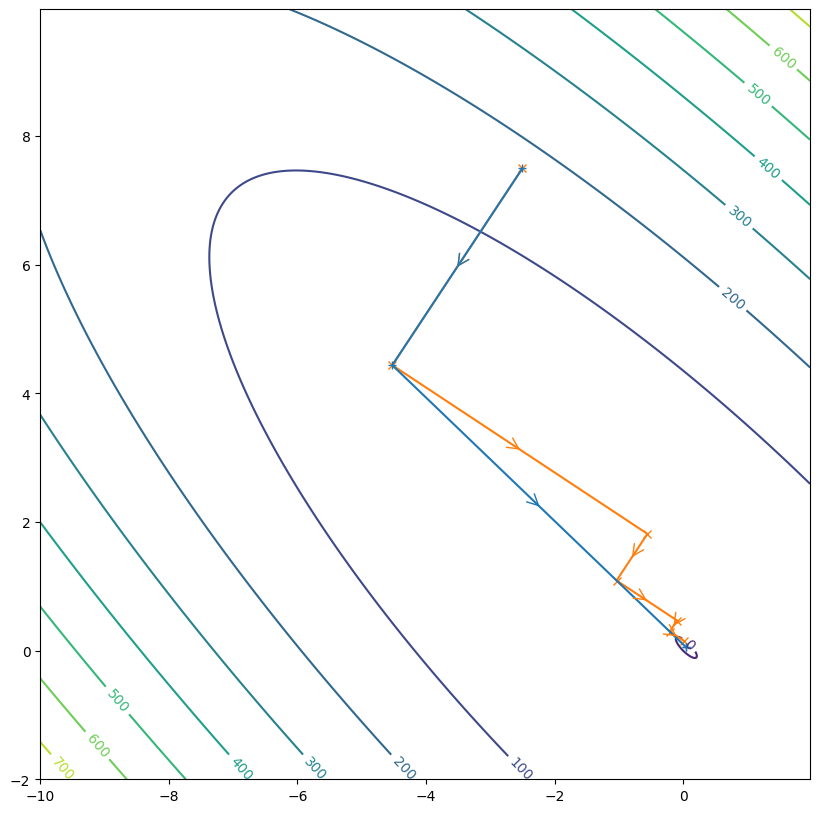

<IPython.core.display.Javascript object>

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))

CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)

ax.plot(
    [u[0] for u in u_list_optimal_step],
    [u[1] for u in u_list_optimal_step],
    marker="x",
    label="optimal step",
    color="tab:orange",
)
x = np.array([u[0][0] for u in u_list_optimal_step])
y = np.array([u[1][0] for u in u_list_optimal_step])
x0 = x[:-1]
x1 = x[1:]
y0 = y[:-1]
y1 = y[1:]
xpos = (x0 + x1) / 2
ypos = (y0 + y1) / 2
xdir = x1 - x0
ydir = y1 - y0

for X, Y, dX, dY in zip(xpos, ypos, xdir, ydir):
    ax.annotate(
        "",
        xytext=(X, Y),
        xy=(X + 0.001 * dX, Y + 0.001 * dY),
        arrowprops=dict(arrowstyle="->", color="tab:orange"),
        size=20,
    )

ax.plot(
    [u[0] for u in u_list_cg],
    [u[1] for u in u_list_cg],
    marker="+",
    label="CG",
    color="tab:blue",
)
x = np.array([u[0][0] for u in u_list_cg])
y = np.array([u[1][0] for u in u_list_cg])
x0 = x[:-1]
x1 = x[1:]
y0 = y[:-1]
y1 = y[1:]
xpos = (x0 + x1) / 2
ypos = (y0 + y1) / 2
xdir = x1 - x0
ydir = y1 - y0

for X, Y, dX, dY in zip(xpos, ypos, xdir, ydir):
    ax.annotate(
        "",
        xytext=(X, Y),
        xy=(X + 0.001 * dX, Y + 0.001 * dY),
        arrowprops=dict(arrowstyle="->", color="tab:blue"),
        size=20,
    )

ax.set_aspect("equal", adjustable="box")